#由于在jupyter上直接显示图片过于麻烦，所以都将输出图片保存，仅展示第一个问题的例子，如果要显示，则将每个代码的最后两行显示图片的代码取消注释即可

问题一：通道交换

读取图像，然后将$\text{RGB}$通道替换成$\text{BGR}$通道。

下面的代码用于提取图像的红色通道。

注意，cv2.imread() 的系数是按$\text{BGR}$顺序排列的！

其中的变量red表示的是仅有原图像红通道的imori.jpg。

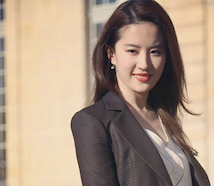

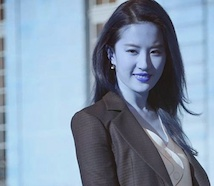

In [32]:
import cv2
from IPython.display import Image as IMG

# Read image
img = cv2.imread("imori.jpg")
b = img[:, :, 0].copy()
g = img[:, :, 1].copy()
r = img[:, :, 2].copy()

# RGB > BGR
img[:, :, 0] = r
img[:, :, 1] = g
img[:, :, 2] = b

# Save result
cv2.imwrite("out.jpg", img)
display(IMG('imori.jpg'))
display(IMG('out.jpg'))


问题二：灰度化（Grayscale）

将图像灰度化吧！

灰度是一种图像亮度的表示方法，通过下式计算： $$ Y = 0.2126\ R + 0.7152\ G + 0.0722\ B $$

In [33]:
import cv2
import numpy as np
def BGRGRAY(img):
    b = img[:, :, 0].copy()
    g = img[:, :, 1].copy()
    r = img[:, :, 2].copy()
    
    out = 0.216*r + 0.7152*g +0.0722*b
    out = out.astype(np.uint8)
    return out
img = cv2.imread("imori.jpg").astype(np.float)   #变成浮点数方便进行矩阵运算
out = BGRGRAY(img)

# Save result
cv2.imwrite("out.jpg", out)
# display(IMG('imori.jpg'))
# display(IMG('out.jpg'))

True

问题三：二值化（Thresholding）

把图像进行二值化吧。

二值化是将图像使用黑和白两种颜色表示的方法。

我们将灰度的阈值设置为$128$来进行二值化，即： $$ y= \begin{cases} 0& (\text{if}\quad y < 128) \ 255& (\text{else}) \end{cases} $$

In [34]:
import cv2
import numpy as np
from IPython.display import Image as IMG
def BGRGRAY(img):
    b = img[:, :, 0].copy()
    g = img[:, :, 1].copy()
    r = img[:, :, 2].copy()
    
    out = 0.216*r + 0.7152*g +0.0722*b
    out = out.astype(np.uint8)
    return out
def binarization(img, th=128):
    img[img < 128] = 0
    img[img >= 128] =255
    return img
img = cv2.imread("imori.jpg").astype(np.float)   #变成浮点数方便进行矩阵运算
out = BGRGRAY(img)
out = binarization(out)

# Save result
cv2.imwrite("out.jpg", out)
# display(IMG('imori.jpg'))
# display(IMG('out.jpg'))

True

图像阈值处理cv2.threshold()函数

In [35]:
import cv2
import numpy as np
img = cv2.imread("imori.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,thresh1 = cv2.threshold(img, 128, 255,cv2.THRESH_BINARY)

# Save result
cv2.imwrite("out.jpg", thresh1)
# display(IMG('imori.jpg'))
# display(IMG('out.jpg'))

True

问题四：大津二值化算法（Otsu's Method）

使用大津算法来二值化图像吧。

大津算法，也被称作最大类间方差法，是一种可以自动确定二值化中阈值的算法。

从类内方差和类间方差的比值计算得来：

小于阈值$t$的类记作$0$，大于阈值$t$的类记作$1$；
$w_0$和$w_1$是被阈值$t$分开的两个类中的像素数占总像素数的比率（满足$w_0+w_1=1$）；
${S_0}^2$， ${S_1}^2$是这两个类中像素值的方差；
$M_0$，$M_1$是这两个类的像素值的平均值；
即：

类内方差：${S_w}^2=w_0\ {S_0}^2+w_1\ {S_1}^2$
类间方差：${S_b}^2 = w_0 \ (M_0 - M_t)^2 + w_1\ (M_1 - M_t)^2 = w_0\ w_1\ (M_0 - M_1) ^2$
图像所有像素的方差：${S_t}^2 = {S_w}^2 + {S_b}^2 = \text{常数}$
根据以上的式子，我们用以下的式子计算分离度$X$：^1

$$ X = \frac{{S_b}^2}{{S_w}^2} = \frac{{S_b}^2}{{S_t}^2 - {S_b}^2} $$

也就是说： $$ \arg\max\limits_{t}\ X=\arg\max\limits_{t}\ {S_b}^2 $$ 换言之，如果使${S_b}^2={w_0}\ {w_1}\ (M_0 - M_1)^2$最大，就可以得到最好的二值化阈值$t$。

In [36]:
#用numpy方法
img = cv2.imread('imori.jpg')
img = img.astype(np.float)
H, W, C = img.shape
# 灰度化
out = 0.2126*img[:,:,2] + 0.7152*img[:,:,1] + 0.0722*img[:,:,0]
out = out.astype(np.uint8)
# 初始化类间方差和最佳阈值
max_sigma = 0
max_t = 0
# 遍历迭代
for _t in range(1, 255):
    # 小于阈值t的类v0
    v0 = out[np.where(out<_t)]
    # 计算v0均值
    M0 = np.mean(v0) if len(v0) > 0 else 0.
    # v0类像素占比
    w0 = len(v0)/(H*W)
    # 大于阈值t的类v1
    v1 = out[np.where(out>=_t)]
    # 计算v1均值
    M1 = np.mean(v1) if len(v1) > 0 else 0.
    # v1类像素占比
    w1 = len(v1)/(H*W)
    # 类间方差
    Sb2 = w0*w1*((M0-M1)**2)
    # 寻优
    if Sb2 > max_sigma:
        max_sigma = Sb2
        max_t = _t
        
# 打印最佳阈值        
print(max_t)

137


In [37]:
img = cv2.imread('imori.jpg')
# 灰度化
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 大津法阈值化处理
ret, th = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Save result
cv2.imwrite("out.jpg", thresh1)
# display(IMG('imori.jpg'))
# display(IMG('out.jpg'))
print(ret,'最优阈值')

138.0 最优阈值


#问题五：$\text{HSV}$变换

将使用$\text{HSV}$表示色彩的图像的色相反转吧！

$\text{HSV}$即使用**色相（Hue）、饱和度（Saturation）、明度（Value）**来表示色彩的一种方式。

- 色相：将颜色使用$0^{\circ}$到$360^{\circ}$表示，就是平常所说的颜色名称，如红色、蓝色。色相与数值按下表对应：

  | 红          | 黄           | 绿            | 青色          | 蓝色          | 品红          | 红            |
  | ----------- | ------------ | ------------- | ------------- | ------------- | ------------- | ------------- |
  | $0^{\circ}$ | $60^{\circ}$ | $120^{\circ}$ | $180^{\circ}$ | $240^{\circ}$ | $300^{\circ}$ | $360^{\circ}$ |

- 饱和度：是指色彩的纯度，饱和度越低则颜色越黯淡（$0\leq S < 1$）；
- 明度：即颜色的明暗程度。数值越高越接近白色，数值越低越接近黑色（$0\leq V < 1$）；

从$\text{RGB}$色彩表示转换到$\text{HSV}$色彩表示通过以下方式计算：

$\text{RGB}$的取值范围为$[0, 1]$，令：
$$
\text{Max}=\max(R,G,B)\\
\text{Min}=\min(R,G,B)
$$
色相：
$$
H=\begin{cases}
0&(\text{if}\ \text{Min}=\text{Max})\\
60\  \frac{G-R}{\text{Max}-\text{Min}}+60&(\text{if}\ \text{Min}=B)\\
60\  \frac{B-G}{\text{Max}-\text{Min}}+180&(\text{if}\ \text{Min}=R)\\
60\  \frac{R-B}{\text{Max}-\text{Min}}+300&(\text{if}\ \text{Min}=G)
\end{cases}
$$
饱和度：
$$
S=\text{Max}-\text{Min}
$$
明度：
$$
V=\text{Max}
$$
从$\text{HSV}$色彩表示转换到$\text{RGB}$色彩表示通过以下方式计算：
$$
C = S\\
H' = \frac{H}{60}\\
X = C\  (1 - |H' \mod 2 - 1|)\\
(R,G,B)=(V-C)\ (1,1,1)+\begin{cases}
(0, 0, 0)&  (\text{if H is undefined})\\
(C, X, 0)&  (\text{if}\quad 0 \leq H' < 1)\\
(X, C, 0)&  (\text{if}\quad 1 \leq H' < 2)\\
(0, C, X)&  (\text{if}\quad 2 \leq H' < 3)\\
(0, X, C)&  (\text{if}\quad 3 \leq H' < 4)\\
(X, 0, C)&  (\text{if}\quad 4 \leq H' < 5)\\
(C, 0, X)&  (\text{if}\quad 5 \leq H' < 6)
\end{cases}
$$
请将色相反转（色相值加$180$），然后再用$\text{RGB}$色彩空间表示图片。
